In [35]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# path to json file that stores spectrograms and genre labels for each processed segment
DATASET_PATH = "data.json"

In [36]:
# function to load data

def load_data(dataset_path):
    
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return: Inputs
        :return: Targets
    """
    
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    #convert lists into numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    
    return inputs, targets

In [37]:
# load data
inputs, targets = load_data(DATASET_PATH)

In [38]:
# split data into tran and test set
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.3)

In [39]:
# build network architecture
model = keras.Sequential([
    # input layer
    keras.layers.Flatten(input_shape = (inputs.shape[1], inputs.shape[2])),
    
    # 1st hidden layer
    keras.layers.Dense(512, activation = "relu"),   #ReLU - Rectified Linear Unit
    
    # 2nd hidden layer
    keras.layers.Dense(256, activation = "relu"),   #ReLU - Rectified Linear Unit
    
    # 3rd hidden layer
    keras.layers.Dense(64, activation = "relu"),   #ReLU - Rectified Linear Unit
    
    # output layer
    keras.layers.Dense(10, activation = "softmax") #softmax - normalizes outputs and pick neuron with max
    
        
])

In [40]:
# compile network
optimizer = keras.optimizers.Adam(learning_rate = 0.0001) # Adam is a powerful stochastic gradient descent model
model.compile(optimizer=optimizer, 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               865792    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [41]:
# train network
history = model.fit(inputs_train, targets_train,
          validation_data=(inputs_test, targets_test),
          epochs=100,
          batch_size=32)

Epoch 1/100
219/219 [==============================] - 1s 5ms/step - loss: 13.5403 - accuracy: 0.2828 - val_loss: 5.2097 - val_accuracy: 0.3902
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 4.0612 - accuracy: 0.4125 - val_loss: 4.2457 - val_accuracy: 0.3926
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 2.6996 - accuracy: 0.4875 - val_loss: 3.6062 - val_accuracy: 0.4090
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 2.0818 - accuracy: 0.5323 - val_loss: 3.0326 - val_accuracy: 0.4387
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 1.6170 - accuracy: 0.6079 - val_loss: 2.8108 - val_accuracy: 0.4634
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3170 - accuracy: 0.6489 - val_loss: 2.9320 - val_accuracy: 0.4514
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 1.0853 - accuracy: 0.6872 - val_loss: 2.9439 - val_accuracy: 0.454

Epoch 58/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0206 - accuracy: 0.9942 - val_loss: 3.0513 - val_accuracy: 0.6091
Epoch 59/100
219/219 [==============================] - 1s 4ms/step - loss: 0.1009 - accuracy: 0.9721 - val_loss: 3.8663 - val_accuracy: 0.5329
Epoch 60/100
219/219 [==============================] - 1s 4ms/step - loss: 0.4598 - accuracy: 0.8795 - val_loss: 3.0524 - val_accuracy: 0.5914
Epoch 61/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0536 - accuracy: 0.9834 - val_loss: 3.0530 - val_accuracy: 0.6054
Epoch 62/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0175 - accuracy: 0.9950 - val_loss: 3.2094 - val_accuracy: 0.6151
Epoch 63/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0349 - accuracy: 0.9914 - val_loss: 3.1005 - val_accuracy: 0.6148
Epoch 64/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0145 - accuracy: 0.9970 - val_loss: 3.1173 - val_accuracy:

# After training model

Train data loss = 0.0466
Traib data sccuracy = 0.9865

Test data loss = 2.5587
Test data sccuracy = 0.6134

Why is the classifier good on training data but poor on test data?
Overfitting!

How do we solve overfitting?

In [42]:
# plot accuracy and error over the epochs
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """
    
    fig, axs = plt.subplots(2)
    
    #create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy Eval")
    
    #create accuracy subplot
    axs[1].plot(history.history["loss"], label="train loss")
    axs[1].plot(history.history["val_loss"], label="test loss")
    axs[1].set_ylabel("Loss/Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss Eval")
    
    plt.show()

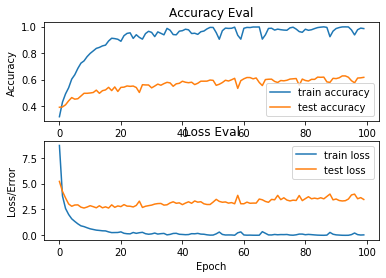

In [43]:
plot_history(history)

# Signs of overfitting
We see that the train accuracy and error diverge significantly from the test accuracy and error. This is sign of overfitting

# Solving overfitting

Use Dropout
Use L2 regularization

In [45]:
# build network architecture with dropout and l2 regularization to reduce overfitting
model_2 = keras.Sequential([
    # input layer
    keras.layers.Flatten(input_shape = (inputs.shape[1], inputs.shape[2])),
    
    # 1st hidden layer
    keras.layers.Dense(512, activation = "relu", kernel_regularizer=keras.regularizers.l2(0.001)),   #ReLU - Rectified Linear Unit
    keras.layers.Dropout(0.3),                       #Dropout to reduce overfitting
    
    # 2nd hidden layer
    keras.layers.Dense(256, activation = "relu", kernel_regularizer=keras.regularizers.l2(0.001)),   #ReLU - Rectified Linear Unit
    keras.layers.Dropout(0.3),                       #Dropout to reduce overfitting
    
    # 3rd hidden layer
    keras.layers.Dense(64, activation = "relu", kernel_regularizer=keras.regularizers.l2(0.001)),   #ReLU - Rectified Linear Unit
    keras.layers.Dropout(0.3),                       #Dropout to reduce overfitting
    
    # output layer
    keras.layers.Dense(10, activation = "softmax") #softmax - normalizes outputs and pick neuron with max
    
        
])

In [46]:
# compile network
optimizer = keras.optimizers.Adam(learning_rate = 0.0001) # Adam is a powerful stochastic gradient descent model
model_2.compile(optimizer=optimizer, 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

In [47]:
# train new network
history_2 = model_2.fit(inputs_train, targets_train,
          validation_data=(inputs_test, targets_test),
          epochs=100,
          batch_size=32)

Epoch 1/100
219/219 [==============================] - 2s 7ms/step - loss: 44.7137 - accuracy: 0.1316 - val_loss: 3.5214 - val_accuracy: 0.1169
Epoch 2/100
219/219 [==============================] - 1s 6ms/step - loss: 7.1575 - accuracy: 0.1432 - val_loss: 3.5061 - val_accuracy: 0.1006
Epoch 3/100
219/219 [==============================] - 1s 6ms/step - loss: 4.6192 - accuracy: 0.1334 - val_loss: 3.5065 - val_accuracy: 0.1006
Epoch 4/100
219/219 [==============================] - 1s 6ms/step - loss: 4.0378 - accuracy: 0.1347 - val_loss: 3.4994 - val_accuracy: 0.1002
Epoch 5/100
219/219 [==============================] - 1s 6ms/step - loss: 3.8057 - accuracy: 0.1357 - val_loss: 3.4782 - val_accuracy: 0.1036
Epoch 6/100
219/219 [==============================] - 1s 6ms/step - loss: 3.6325 - accuracy: 0.1359 - val_loss: 3.4741 - val_accuracy: 0.1086
Epoch 7/100
219/219 [==============================] - 1s 6ms/step - loss: 3.5752 - accuracy: 0.1366 - val_loss: 3.4266 - val_accuracy: 0.134

Epoch 58/100
219/219 [==============================] - 1s 7ms/step - loss: 2.2056 - accuracy: 0.3305 - val_loss: 2.3307 - val_accuracy: 0.3181
Epoch 59/100
219/219 [==============================] - 1s 7ms/step - loss: 2.1769 - accuracy: 0.3350 - val_loss: 2.3147 - val_accuracy: 0.3060
Epoch 60/100
219/219 [==============================] - 1s 7ms/step - loss: 2.1634 - accuracy: 0.3434 - val_loss: 2.3635 - val_accuracy: 0.3278
Epoch 61/100
219/219 [==============================] - 1s 6ms/step - loss: 2.1500 - accuracy: 0.3394 - val_loss: 2.2859 - val_accuracy: 0.3274
Epoch 62/100
219/219 [==============================] - 1s 6ms/step - loss: 2.1158 - accuracy: 0.3374 - val_loss: 2.2819 - val_accuracy: 0.3408
Epoch 63/100
219/219 [==============================] - 1s 6ms/step - loss: 2.0890 - accuracy: 0.3680 - val_loss: 2.2474 - val_accuracy: 0.3244
Epoch 64/100
219/219 [==============================] - 1s 6ms/step - loss: 2.0546 - accuracy: 0.3657 - val_loss: 2.2609 - val_accuracy:

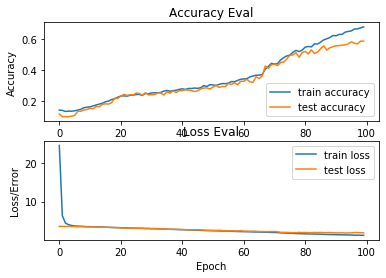

In [48]:
plot_history(history_2)

# Overfitting reduced
We see that the overfitting problem is minimized by applying:
-Dropout
-L2 regularization